In [41]:
import numpy as np
import matplotlib.pyplot as plt

from utils import speed

In [42]:
data = np.loadtxt('../dataset/898/1376290443974')
head, tail = data[:30], data[30:]
print(head, '\n\n', tail)

[[6.25924850e+01 2.97683160e+01 1.37629044e+12 0.00000000e+00]
 [6.25924910e+01 2.97683730e+01 1.37629045e+12 0.00000000e+00]
 [6.25924910e+01 2.97683730e+01 1.37629045e+12 0.00000000e+00]
 [6.25924910e+01 2.97683730e+01 1.37629045e+12 0.00000000e+00]
 [6.25924910e+01 2.97683730e+01 1.37629045e+12 0.00000000e+00]
 [6.25924910e+01 2.97683730e+01 1.37629046e+12 0.00000000e+00]
 [6.25924750e+01 2.97683470e+01 1.37629046e+12 0.00000000e+00]
 [6.25924480e+01 2.97683520e+01 1.37629046e+12 0.00000000e+00]
 [6.25924700e+01 2.97683880e+01 1.37629047e+12 0.00000000e+00]
 [6.25924970e+01 2.97684310e+01 1.37629048e+12 0.00000000e+00]
 [6.25925570e+01 2.97683750e+01 1.37629048e+12 0.00000000e+00]
 [6.25926090e+01 2.97683410e+01 1.37629048e+12 0.00000000e+00]
 [6.25927110e+01 2.97682800e+01 1.37629048e+12 0.00000000e+00]
 [6.25927800e+01 2.97682450e+01 1.37629048e+12 0.00000000e+00]
 [6.25928480e+01 2.97682120e+01 1.37629049e+12 0.00000000e+00]
 [6.25929160e+01 2.97681740e+01 1.37629049e+12 0.000000

In [43]:
speed.calculate_speed_in_ms(head[-2], head[-1])

4.252598172817497

In [44]:
head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

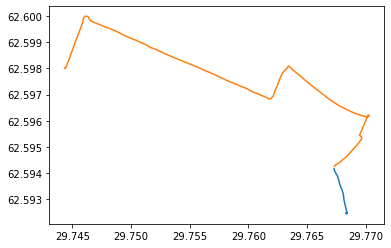

In [48]:
plt.plot(head_y, head_x)
plt.plot(tail_y, tail_x)
plt.show()